# Predictions on different data quality

## Parameters and model

In [1]:
import sys

sys.path.append('..')
from timeseries.timeseries import StockMarketSeries
from timeseries.utils import SeriesColumn, DeviationSource
from predictions.model import PredictionModel

company_name = "Apple"
path = "../data/timeseries/apple.csv"
time_series_start = 0
time_series_end = 180
column = SeriesColumn.CLOSE
stock = StockMarketSeries(company_name, path, time_series_start, time_series_end,
                           weights={SeriesColumn.OPEN: 0.2,
                                    SeriesColumn.CLOSE: 0.2,
                                    SeriesColumn.ADJ_CLOSE: 0.25,
                                    SeriesColumn.HIGH: 0.15,
                                    SeriesColumn.LOW: 0.15,
                                    SeriesColumn.VOLUME: 0.05})

## Data - one price column

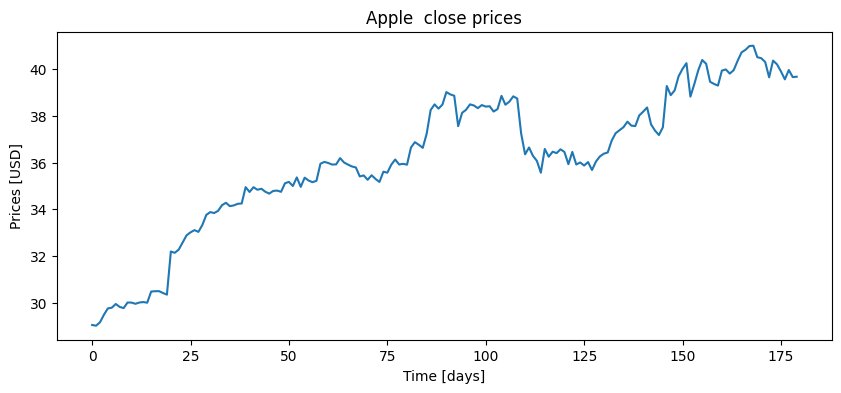

In [2]:
stock.plot_single_series(stock.real_series[column], column)

## Predictions parameters

In [3]:
prediction_start = 160
iterations = 3

model = PredictionModel(stock, prediction_start, column, iterations=iterations)

## Statistical methods

In [4]:
from arima import ManualArima

arima_type = ManualArima

## AR(5)

In [5]:
arima = model.configure_model(arima_type, p=5, q=0)

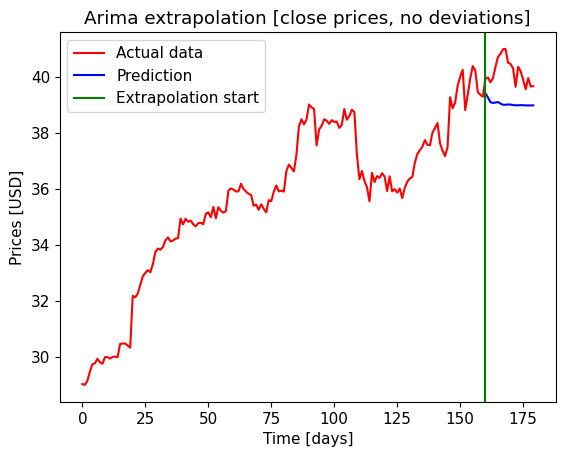

In [6]:
%%capture --no-stdout --no-display
arima.plot_prediction(source=DeviationSource.NONE)

In [7]:
%%capture --no-stdout --no-display
arima.compute_statistics_set()

KeyboardInterrupt: 

## ARIMA(5,1,5)

In [8]:
arima = model.configure_model(arima_type, p=5, q=2)

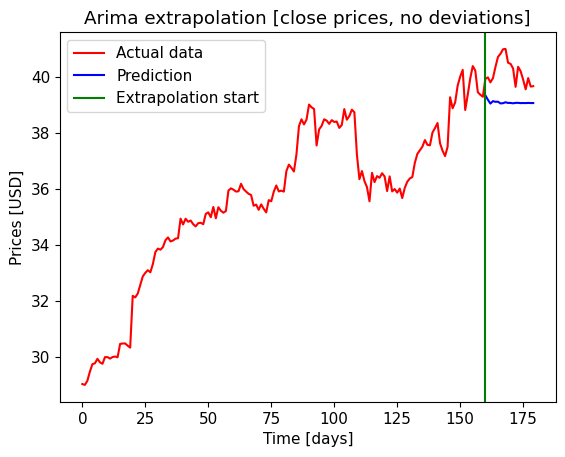

In [9]:
%%capture --no-stdout --no-display
arima.plot_prediction(source=DeviationSource.NONE)

In [10]:
%%capture --no-stdout --no-display
arima.compute_statistics_set()

Statistics [Apple stock, close price, 3 iterations]

  Deviation Scale         Time     Time SD    RMSE     MAE   MAPE MAPE SD
0         -     -  2002.666667  103.645228   1.186   1.096  2.713     0.0
1         N     S         1769   45.033321   0.774   0.606   1.49     0.0
2         N     M         2385  147.726098   1.441    1.15  2.806     0.0
3         N     H  2093.333333   62.947068   2.319   1.717  4.253     0.0
4         I     S         4143   79.774683   8.812   5.258    inf     NaN
5         I     M         3978   64.373908   9.124   6.285    inf     NaN
6         I     H  4260.333333  154.513214  18.913  17.651    inf     NaN
7         T     S         2076   12.288206     1.2   1.092  2.731     0.0
8         T     M  2983.333333   28.360771   0.682   0.594  1.535     0.0
9         T     H  6633.333333    8.326664   4.084   4.029  9.325     0.0
\begin{tabular}{llllllll}
\toprule
Deviation & Scale &   Time & Time SD & RMSE &  MAE & MAPE & MAPE SD \\
\midrule
        - &     - 

## XGBoost

In [4]:
from ml import XGBoost

xgboost = model.configure_model(XGBoost, optimize=False)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: courier
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: courier


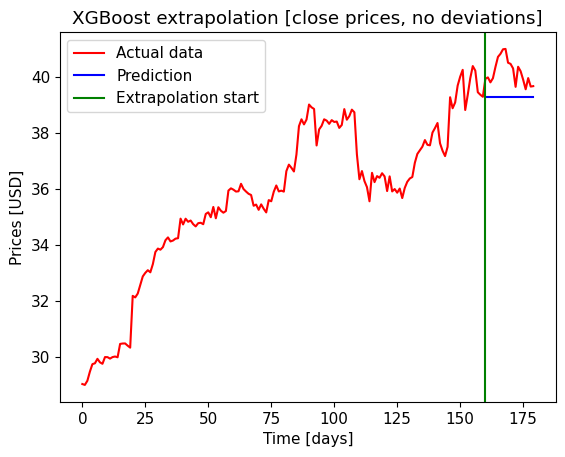

In [5]:
xgboost.plot_prediction(source=DeviationSource.NONE)

In [7]:
%%capture --no-stdout --no-display
xgboost.compute_statistics_set()

KeyboardInterrupt: 

## Reservoir computing

In [14]:
from predictions.ml import Reservoir

reservoir = model.configure_model(Reservoir)

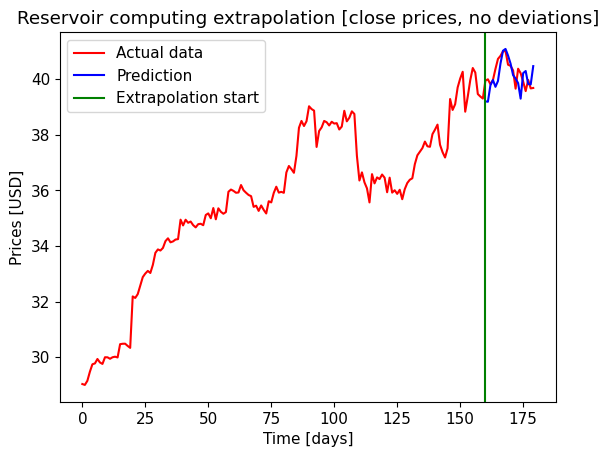

In [15]:
reservoir.plot_prediction(source=DeviationSource.NONE)

In [16]:
%%capture --no-stdout --no-display
reservoir.compute_statistics_set()

_LinAlgError: linalg.svd: The algorithm failed to converge because the input matrix is ill-conditioned or has too many repeated singular values (error code: 14).